1A. Implimentation of perceptron for AND & OR gates

In [ ]:
#MODULE 1
#1A
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Air_Traffic_Landings_Statistics_20241218.csv'
data = pd.read_csv(file_path)

# Extract and prepare the data
selected_columns = data[['GEO Summary', 'Landing Count']]
selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)
selected_columns['AND_Output'] = selected_columns['Input1'] & selected_columns['Input2']
selected_columns['OR_Output'] = selected_columns['Input1'] | selected_columns['Input2']

# Prepare the perceptron data
perceptron_data = selected_columns[['Input1', 'Input2', 'AND_Output', 'OR_Output']]

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (target - prediction) * inputs
                self.weights[0] += self.learning_rate * (target - prediction)  # Update bias

# Prepare data for training
X = perceptron_data[['Input1', 'Input2']].values
y_and = perceptron_data['AND_Output'].values
y_or = perceptron_data['OR_Output'].values

# Train perceptron for AND gate
perceptron_and = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_and.train(X, y_and)

# Train perceptron for OR gate
perceptron_or = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_or.train(X, y_or)

# Test perceptron predictions
predictions_and = [perceptron_and.predict(x) for x in X]
predictions_or = [perceptron_or.predict(x) for x in X]

# Display results
result = pd.DataFrame({
    'Input1': X[:, 0],
    'Input2': X[:, 1],
    'AND_Actual': y_and,
    'AND_Predicted': predictions_and,
    'OR_Actual': y_or,
    'OR_Predicted': predictions_or
})

print(result.head())





<ipython-input-1-9dd562369a45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
<ipython-input-1-9dd562369a45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)
<ipython-input-1-9dd562369a45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

   Input1  Input2  AND_Actual  AND_Predicted  OR_Actual  OR_Predicted
0       1       0           0              0          1             1
1       1       1           1              1          1             1
2       1       1           1              1          1             1
3       1       0           0              0          1             1
4       0       0           0              0          0             0


1B. Implementation of perceptron for binary classification


<ipython-input-2-1b63f1aa1d9a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
<ipython-input-2-1b63f1aa1d9a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)
<ipython-input-2-1b63f1aa1d9a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Perceptron Accuracy: 100.00%


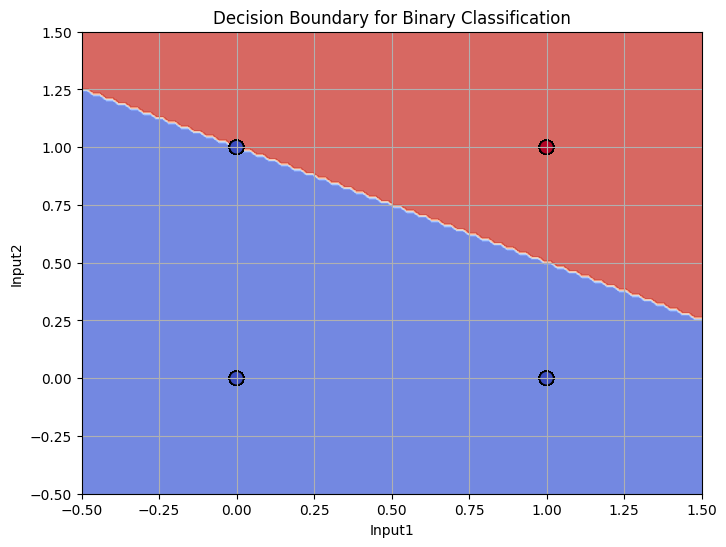

In [ ]:
#1B
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Excel file)
file_path = '/content/Air_Traffic_Landings_Statistics_20241218.csv'
data = pd.read_csv(file_path)

# Prepare the data for binary classification
selected_columns = data[['GEO Summary', 'Landing Count']]
selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)
selected_columns['Output'] = selected_columns['Input1'] & selected_columns['Input2']  # Binary target for AND gate

# Binary classification data
X = selected_columns[['Input1', 'Input2']].values
y = selected_columns['Output'].values

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (target - prediction) * inputs
                self.weights[0] += self.learning_rate * (target - prediction)  # Update bias

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Test perceptron predictions
predictions = [perceptron.predict(x) for x in X]

# Evaluate accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Perceptron Accuracy: {accuracy:.2f}%")

# Visualize the decision boundary
def plot_decision_boundary(X, y, perceptron):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(point) for point in grid])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=100)
    plt.title("Decision Boundary for Binary Classification")
    plt.xlabel("Input1")
    plt.ylabel("Input2")
    plt.grid(True)
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, perceptron)

2A.Implementation of single layer perceptron for AND & OR gates

<ipython-input-3-37ec696603d0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
<ipython-input-3-37ec696603d0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)
<ipython-input-3-37ec696603d0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

   Input1  Input2  AND_Actual  AND_Predicted  OR_Actual  OR_Predicted
0       1       0           0              0          1             1
1       1       1           1              1          1             1
2       1       1           1              1          1             1
3       1       0           0              0          1             1
4       0       0           0              0          0             0


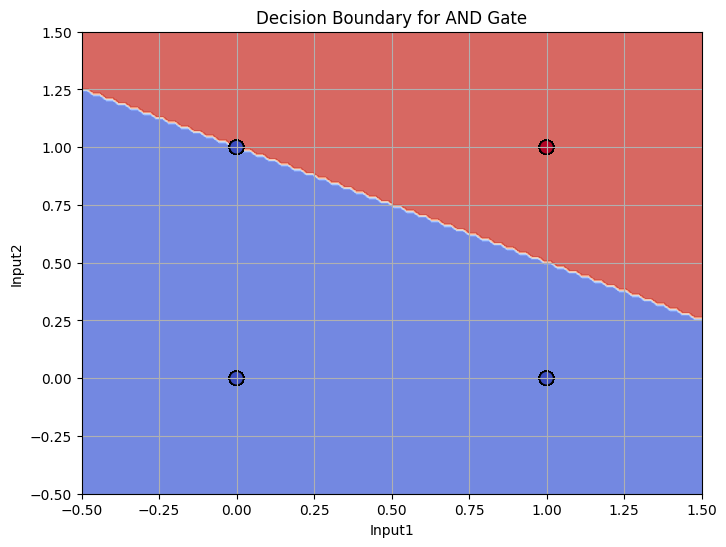

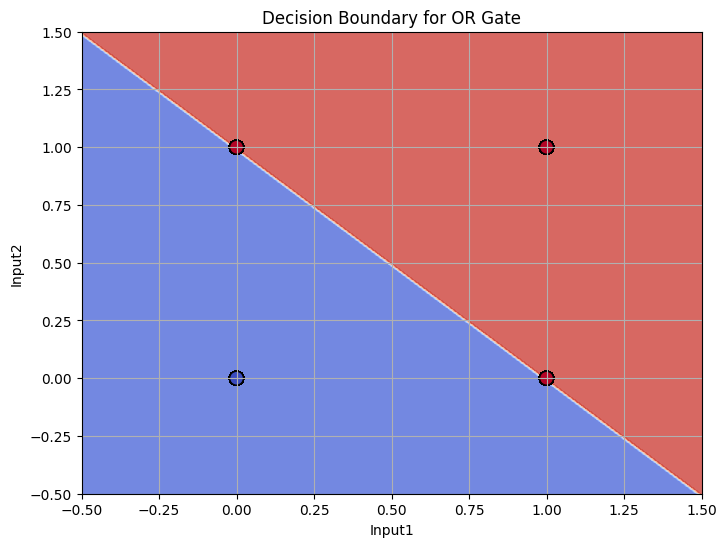

In [ ]:
#2A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Excel file)
file_path = '/content/Air_Traffic_Landings_Statistics_20241218.csv'
data = pd.read_csv(file_path)

# Prepare the data for the perceptron
selected_columns = data[['GEO Summary', 'Landing Count']]
selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)
selected_columns['AND_Output'] = selected_columns['Input1'] & selected_columns['Input2']  # AND gate target
selected_columns['OR_Output'] = selected_columns['Input1'] | selected_columns['Input2']  # OR gate target

# Extract inputs and outputs
X = selected_columns[['Input1', 'Input2']].values
y_and = selected_columns['AND_Output'].values
y_or = selected_columns['OR_Output'].values

# Define the Single-Layer Perceptron class
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (target - prediction) * inputs
                self.weights[0] += self.learning_rate * (target - prediction)  # Update bias

# Train perceptron for AND gate
perceptron_and = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_and.train(X, y_and)

# Train perceptron for OR gate
perceptron_or = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_or.train(X, y_or)

# Test perceptron predictions for AND gate
predictions_and = [perceptron_and.predict(x) for x in X]

# Test perceptron predictions for OR gate
predictions_or = [perceptron_or.predict(x) for x in X]

# Evaluate results
results = pd.DataFrame({
    'Input1': X[:, 0],
    'Input2': X[:, 1],
    'AND_Actual': y_and,
    'AND_Predicted': predictions_and,
    'OR_Actual': y_or,
    'OR_Predicted': predictions_or
})

print(results.head())

# Visualize decision boundaries
def plot_decision_boundary(X, y, perceptron, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(point) for point in grid])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=100)
    plt.title(title)
    plt.xlabel("Input1")
    plt.ylabel("Input2")
    plt.grid(True)
    plt.show()

# Plot decision boundary for AND gate
plot_decision_boundary(X, y_and, perceptron_and, "Decision Boundary for AND Gate")

# Plot decision boundary for OR gate
plot_decision_boundary(X, y_or, perceptron_or, "Decision Boundary for OR Gate")


2B.Implementation of single layer perceptron for binary classification

<ipython-input-5-4f98e9b98829>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
<ipython-input-5-4f98e9b98829>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)
<ipython-input-5-4f98e9b98829>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

   Input1  Input2  Actual  Predicted
0       1       0       0          0
1       1       1       1          1
2       1       1       1          1
3       1       0       0          0
4       0       0       0          0


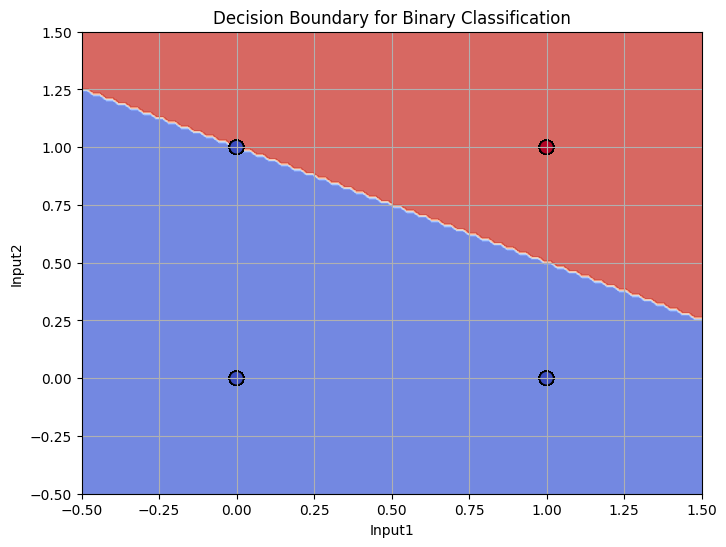

In [ ]:
#2B
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Excel file)
file_path = '/content/Air_Traffic_Landings_Statistics_20241218.csv'
data = pd.read_csv(file_path)

# Prepare the data for the perceptron
selected_columns = data[['GEO Summary', 'Landing Count']]
selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)

# Define a new binary target (for example: 1 if both conditions are True, else 0)
selected_columns['Binary_Target'] = (selected_columns['Input1'] & selected_columns['Input2']).astype(int)

# Extract inputs and outputs
X = selected_columns[['Input1', 'Input2']].values
y = selected_columns['Binary_Target'].values

# Define the Single-Layer Perceptron class
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (target - prediction) * inputs
                self.weights[0] += self.learning_rate * (target - prediction)  # Update bias

# Train perceptron for binary classification
perceptron = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Test perceptron predictions
predictions = [perceptron.predict(x) for x in X]

# Evaluate results
results = pd.DataFrame({
    'Input1': X[:, 0],
    'Input2': X[:, 1],
    'Actual': y,
    'Predicted': predictions
})

print(results.head())

# Visualize decision boundary for binary classification
def plot_decision_boundary(X, y, perceptron, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(point) for point in grid])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=100)
    plt.title(title)
    plt.xlabel("Input1")
    plt.ylabel("Input2")
    plt.grid(True)
    plt.show()

# Plot decision boundary for binary classification
plot_decision_boundary(X, y, perceptron, "Decision Boundary for Binary Classification")


2C.Implementation of single layer perceptron for multiclass classification

<ipython-input-10-4d7773e8e2b4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)
<ipython-input-10-4d7773e8e2b4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Landing Count'] = pd.to_numeric(selected_columns['Landing Count'], errors='coerce')
<ipython-input-10-4d7773e8e2b4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

   Input1  Input2  AND_Actual  AND_Predicted  OR_Actual  OR_Predicted
0       1       0           0              0          1             1
1       1       1           1              1          1             1
2       1       1           1              1          1             1
3       1       0           0              0          1             1
4       0       0           0              0          0             0


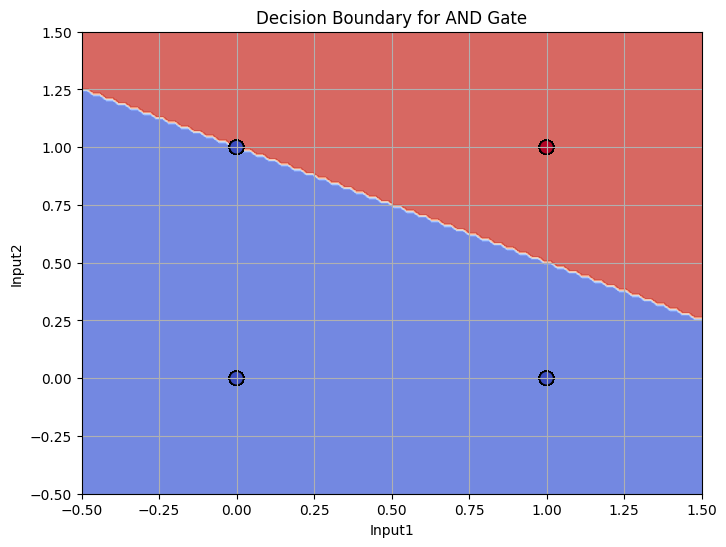

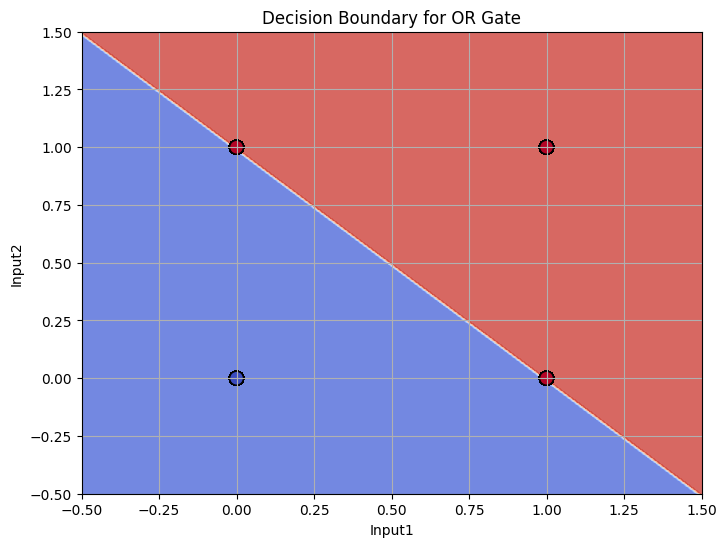

In [ ]:
2C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Excel file)
file_path = '/content/Air_Traffic_Landings_Statistics_20241218.csv'
data = pd.read_csv(file_path)

# Prepare the data for the perceptron
selected_columns = data[['GEO Summary', 'Landing Count']]

# Convert 'GEO Summary' column to a binary numeric format: Domestic = 1, others = 0
selected_columns['Input1'] = (selected_columns['GEO Summary'] == 'Domestic').astype(int)

# Ensure that 'Landing Count' is treated as numeric (if needed)
selected_columns['Landing Count'] = pd.to_numeric(selected_columns['Landing Count'], errors='coerce')

# Create a new column for the second input where Landing Count > 50
selected_columns['Input2'] = (selected_columns['Landing Count'] > 50).astype(int)

# Create AND and OR gate target columns
selected_columns['AND_Output'] = selected_columns['Input1'] & selected_columns['Input2']  # AND gate target
selected_columns['OR_Output'] = selected_columns['Input1'] | selected_columns['Input2']  # OR gate target

# Extract inputs and outputs
X = selected_columns[['Input1', 'Input2']].values
y_and = selected_columns['AND_Output'].values
y_or = selected_columns['OR_Output'].values

# Define the Single-Layer Perceptron class
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (target - prediction) * inputs
                self.weights[0] += self.learning_rate * (target - prediction)  # Update bias

# Train perceptron for AND gate
perceptron_and = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_and.train(X, y_and)

# Train perceptron for OR gate
perceptron_or = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_or.train(X, y_or)

# Test perceptron predictions for AND gate
predictions_and = [perceptron_and.predict(x) for x in X]

# Test perceptron predictions for OR gate
predictions_or = [perceptron_or.predict(x) for x in X]

# Evaluate results
results = pd.DataFrame({
    'Input1': X[:, 0],
    'Input2': X[:, 1],
    'AND_Actual': y_and,
    'AND_Predicted': predictions_and,
    'OR_Actual': y_or,
    'OR_Predicted': predictions_or
})

print(results.head())

# Visualize decision boundaries
def plot_decision_boundary(X, y, perceptron, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(point) for point in grid])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=100)
    plt.title(title)
    plt.xlabel("Input1")
    plt.ylabel("Input2")
    plt.grid(True)
    plt.show()

# Plot decision boundary for AND gate
plot_decision_boundary(X, y_and, perceptron_and, "Decision Boundary for AND Gate")

# Plot decision boundary for OR gate
plot_decision_boundary(X, y_or, perceptron_or, "Decision Boundary for OR Gate")


3.Multi-Layer Perceptron (MLP) for XOR Gate.
Design and train MLP to solve the XOR problem.


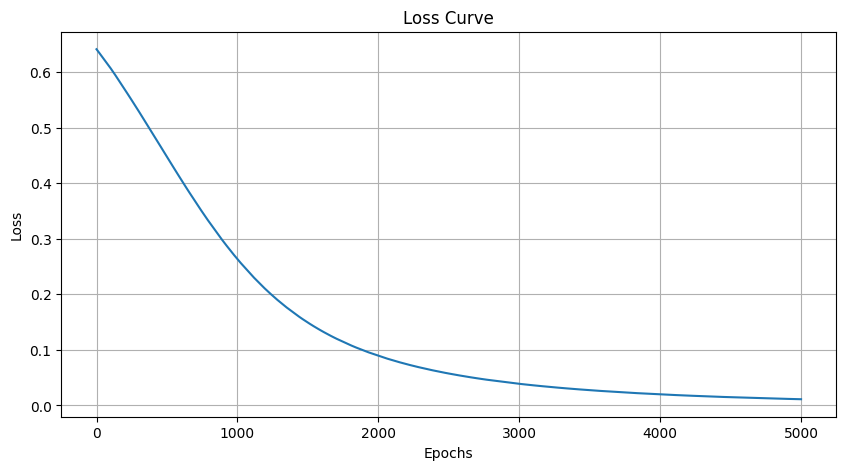

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


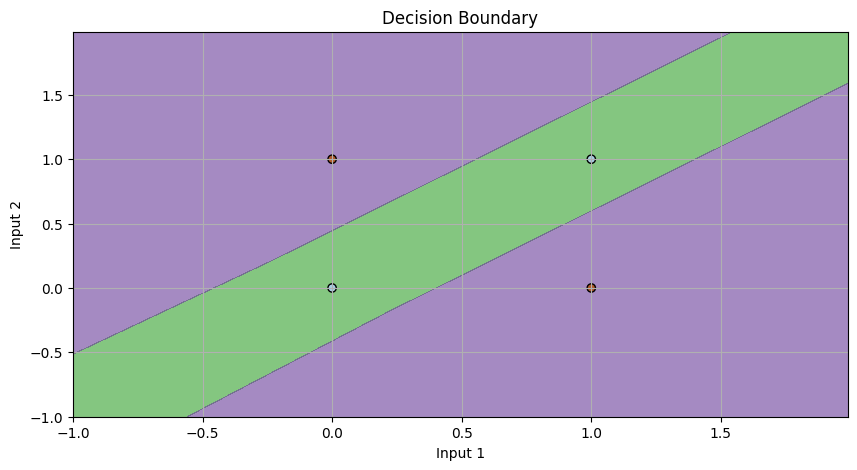

Model Accuracy: 1.00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Build the MLP model
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # Hidden layer with 4 neurons
    Dense(1, activation='sigmoid')            # Output layer with 1 neuron
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=5000, verbose=0)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid)

    plt.figure(figsize=(10, 5))
    plt.contourf(xx, yy, predictions.reshape(xx.shape), levels=[0, 0.5, 1], alpha=0.6, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    plt.title('Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.grid()
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X, y, model)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {accuracy:.2f}")


4.Activation Functions.
Implement Sigmoid, ReLU, and Tanh activation functions.
Compare their outputs on a dataset.


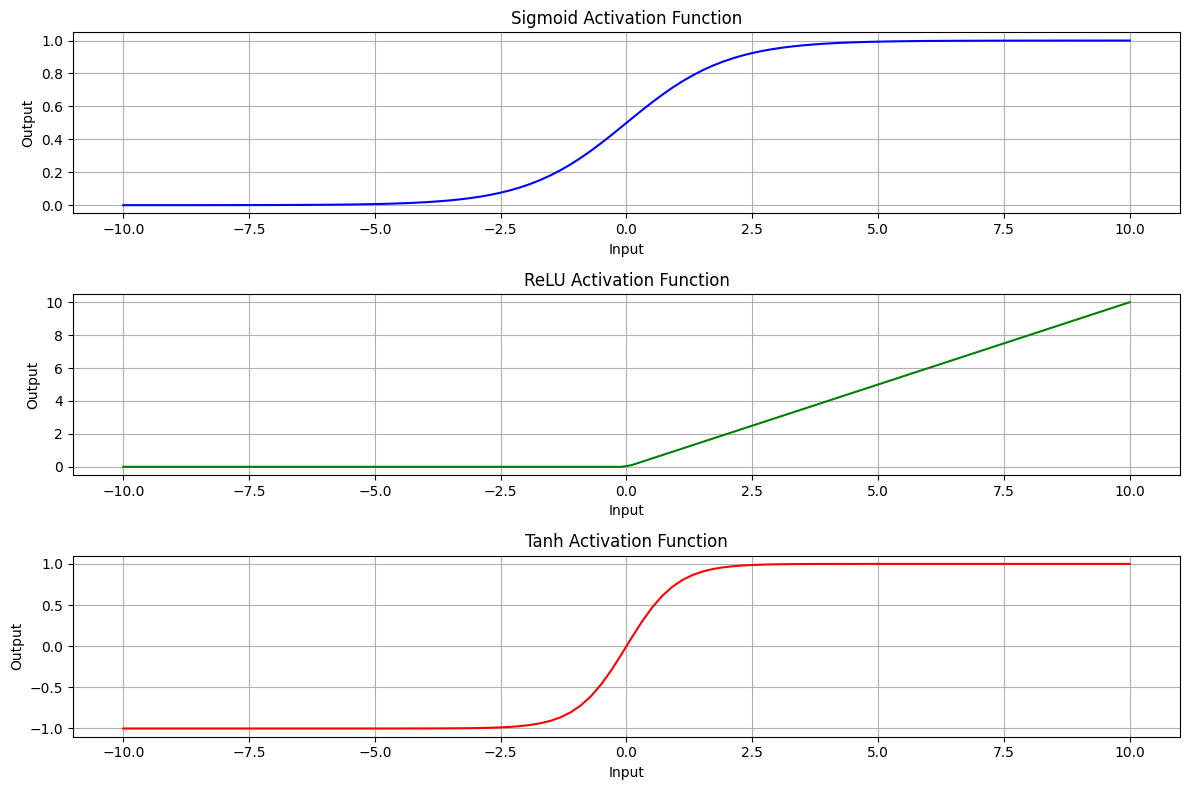

   Input   Sigmoid  ReLU      Tanh
0     -2  0.119203     0 -0.964028
1     -1  0.268941     0 -0.761594
2      0  0.500000     0  0.000000
3      1  0.731059     1  0.761594
4      2  0.880797     2  0.964028


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate input data
x = np.linspace(-10, 10, 100)

# Compute outputs for each activation function
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot activation functions
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(3, 1, 1)
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()

# ReLU
plt.subplot(3, 1, 2)
plt.plot(x, y_relu, label='ReLU', color='green')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()

# Tanh
plt.subplot(3, 1, 3)
plt.plot(x, y_tanh, label='Tanh', color='red')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

# Compare outputs on a dataset
data = np.array([-2, -1, 0, 1, 2])
outputs = {
    'Input': data,
    'Sigmoid': sigmoid(data),
    'ReLU': relu(data),
    'Tanh': tanh(data)
}

# Display the results as a table
import pandas as pd
results_df = pd.DataFrame(outputs)
print(results_df)


5.Forward and Backpropagation.
Implement forward propagation and backpropagation manually for a 2-layer neural network.


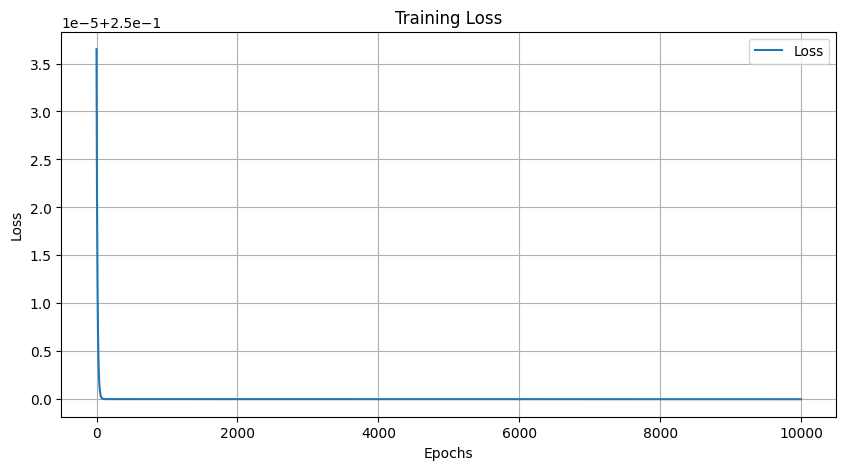

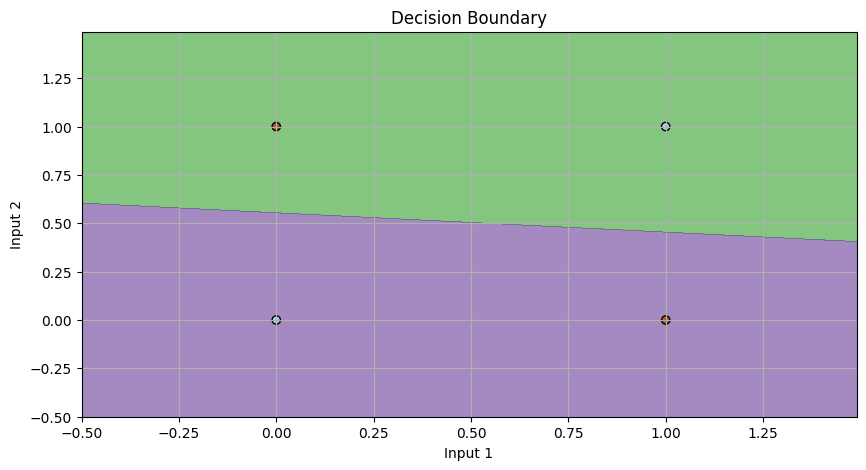

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define a 2-layer neural network
class TwoLayerNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward propagation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate=0.1):
        # Backpropagation
        m = X.shape[0]

        # Compute output layer error
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Compute hidden layer error
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            # Forward and backward pass
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)  # Mean Squared Error
            losses.append(loss)
            self.backward(X, y)

        return losses

# Generate synthetic data for a binary classification problem
np.random.seed(42)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
nn = TwoLayerNN(input_size=2, hidden_size=2, output_size=1)
losses = nn.train(X, y, epochs=10000)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

# Visualize decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.forward(grid)
    predictions = predictions.reshape(xx.shape)

    plt.figure(figsize=(10, 5))
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], alpha=0.6, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    plt.title('Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.grid()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, nn)
